In [ ]:
!python generate_ludo_gameplay_sequence.py

In [ ]:
from glob import glob
import numpy as np
import tensorflow as tf

In [ ]:
for i in glob("ludoHistory/*.npy"):
    game = np.load(i,allow_pickle=True)
    break

In [ ]:
#defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(16,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])
loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
#converting the input from 4X4 to 1X16
#Right now it is only taking the position of the pawns
#later we will update this to take current dice value
def netInput(states):
    netInput = np.array((np.zeros((1,16))))
    for state in states:
        temp = state[0][0]
        for j in state[0][1:]:
            temp = np.concatenate((temp,j), axis=0)
        netInput = np.vstack((netInput,temp))
    return netInput

In [ ]:
netInputs = netInput(game)

In [ ]:
target = model
for _ in range(10):
    #selecting n(5) random inputs
    randIdx = np.random.randint(netInputs.shape[0],size=5)
    inputs = netInputs[randIdx]
    #predicting the input with the target netowrk
    #this values is not right have to update this for final model
    y = target.predict(inputs)
    #training the model 
    model.fit(inputs,y,epochs=1)
    #updating the target network after training on n samples
    target = model

In [ ]:
import numpy as np

In [ ]:
x = np.array([[1,2,3],[0,1,0],[0,0,1]])

y = x[np.all(x == 0, axis=1)]

In [ ]:
x = [1,2,3]

In [ ]:
y= x.reverse()

In [28]:
import run_ludo

In [3]:
import winRatePlot as plot
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt

/home/kartik/.conda/envs/ve2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kartik/.conda/envs/ve2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kartik/.conda/envs/ve2/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kartik/.conda/envs/ve2/lib/python3.6/site-packages/tensorf

In [4]:
def getEpisodeNum(modelNum):
    i = len(modelName)-1
    while modelName[i].isdigit():
        i -= 1
    return modelName[i+1:]

In [5]:
path = "output/weights/ludo/{}/checkpoint"
modelPath = "output/weights/ludo/{}/{}"
player_num = 1
randomMovesDict = defaultdict(dict)
for i in ["same","reverse","monte"]:
    print("-----------{}--------------".format(i))
    new_path = path.format(i)
    new_modelPath = modelPath.format(i,"{}")
    with open(new_path) as checkpoints:
        for cp in checkpoints:
            modelName = cp.split(":")[1]
            modelName = modelName.strip(' "\'\t\r\n')
            newModelPath = new_modelPath.format(modelName)
            episodeNum = getEpisodeNum(modelName)
            randomMovesDict[i][episodeNum] = plot.winRate(newModelPath,10,player_num)

-----------same--------------
output/weights/ludo/same/ludo-v2.ckpt50000 ---
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

INFO:tensorflow:Restoring parameters from output/weights/ludo/same/ludo-v2.ckpt50000
output/weights/ludo/same/ludo-v2.ckpt1000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/same/ludo-v2.ckpt1000
output/weights/ludo/same/ludo-v2.ckpt2000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/same/ludo-v2.ckpt2000
output/weights/ludo/same/ludo-v2.ckpt3000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/same/ludo-v2.ckpt3000
output/weights/ludo/same/ludo-v2.ckpt4000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/same/ludo-v2.ckpt4000
output/weights/ludo/same/ludo-v2.ckpt5000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/same/ludo-v2.ckpt5

output/weights/ludo/reverse/ludo-v2.ckpt8000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt8000
output/weights/ludo/reverse/ludo-v2.ckpt9000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt9000
output/weights/ludo/reverse/ludo-v2.ckpt10000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt10000
output/weights/ludo/reverse/ludo-v2.ckpt11000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt11000
output/weights/ludo/reverse/ludo-v2.ckpt12000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt12000
output/weights/ludo/reverse/ludo-v2.ckpt13000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt13000
output/weights/ludo/reverse/ludo-v2.ckpt14000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/reverse/ludo-v2.ckpt14000
output/weights/ludo/reverse/ludo-v2.ck

output/weights/ludo/monte/ludo-v2.ckpt17000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt17000
output/weights/ludo/monte/ludo-v2.ckpt18000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt18000
output/weights/ludo/monte/ludo-v2.ckpt19000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt19000
output/weights/ludo/monte/ludo-v2.ckpt20000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt20000
output/weights/ludo/monte/ludo-v2.ckpt21000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt21000
output/weights/ludo/monte/ludo-v2.ckpt22000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt22000
output/weights/ludo/monte/ludo-v2.ckpt23000 ---
INFO:tensorflow:Restoring parameters from output/weights/ludo/monte/ludo-v2.ckpt23000
output/weights/ludo/monte/ludo-v2.ckpt24000 ---
INFO:tensorflo

/home/kartik/.conda/envs/ve2/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


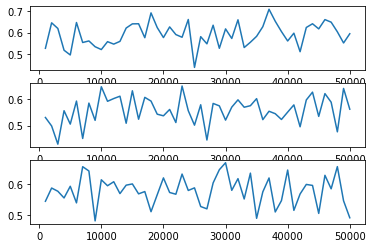

In [6]:
fig,ax = plt.subplots(nrows=3,ncols=1)
count = 0
for _,d in randomMovesDict.items():
    x = np.array([[1,1]])
    for keys,values in d.items():
        values = np.array(values[1])
        ratio = sum(values[:,0])/sum(values[:,1])
        x = np.vstack((x,np.array([int(keys),ratio])))
    x = x[x[:,0].argsort()]
    x = np.delete(x,0,axis=0)
    ax[count].plot(x[:,0],x[:,1])
    count += 1
fig.show()

In [13]:
plt.show()

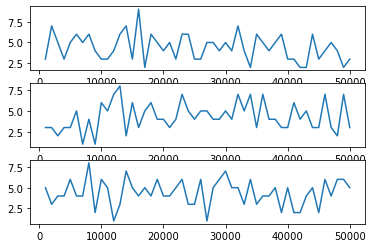

In [7]:
ax = None
fig,ax = plt.subplots(nrows=3,ncols=1)
count = 0
for _,d in randomMovesDict.items():
    x = np.array([[1,1]])
    for keys,values in d.items():
        values = values[0]
        #print(values[1])
        x = np.vstack((x,np.array([int(keys),values[player_num]])))
    x = x[x[:,0].argsort()]
    x = np.delete(x,0,axis=0)
    ax[count].plot(x[:,0],x[:,1])
    count += 1

In [14]:
values.get()

AttributeError: 'numpy.ndarray' object has no attribute 'get'